# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import importlib
from termcolor import colored, cprint
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Funciones

In [2]:
sys.path.append('../src/')
import functions_rfc as fr
sys.path.remove('../src/')

### Constantes:
SEED=10

In [3]:
sys.path.append('../src/')
importlib.reload(fr)
sys.path.remove('../src/')

In [4]:
train = pd.read_csv('../data/raw/cell2celltrain.csv')
holdout = pd.read_csv('../data/raw/cell2cellholdout.csv')
display(train.head(), holdout.head())

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [5]:
X = train.drop(columns='Churn', axis=1)
y = train['Churn'].map({'Yes': 1, 'No': 0})

In [6]:
display(X.head(), y.head())

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [7]:
def Preprocessing(df, cat_transf='mix', scale=True, cat_vars=None, num_vars=None, bool_vars=None, vars_ord=[], vars_oh=[], not_scale=[], nulls_strategy='median', show_info=False):
    """
    ----------------------------------------------------------------------------------------------------------
    Preprocessing function:
    ----------------------------------------------------------------------------------------------------------
    - Description: Function that receives a dataframe and performs the preprocessing based on the parameters
                that the user chooses.
    - Inputs:
        - \033[1mdf:\033[0m dataframe to be preprocessed.
        - \033[1mcat_transf:\033[0m type of transformation for categorical variables. It can be 'ordinal',
        'onehot', 'mean' or 'mix'.
        - \033[1mscale:\033[0m boolean that indicates if the numeric variables should be scaled.
        - \033[1mcat_vars:\033[0m list of categorical variables to be transformed.
        - \033[1mnum_vars:\033[0m list of numeric variables to be transformed.
        - \033[1mbool_vars:\033[0m list of boolean variables to be transformed.
        - \033[1mvars_ord:\033[0m list of categorical variables to be transformed using ordinal encoding.
        - \033[1mvars_oh:\033[0m list of categorical variables to be transformed using onehot encoding.
        - \033[1mnot_scale:\033[0m list of numeric variables that should not be scaled.
        - \033[1mnulls_strategy:\033[0m strategy to fill null values in numeric variables. It can be 'mean',
        'median' or 'most_frequent'.
    
    - Output: preprocessor object that can be used in a pipeline.
    """

    # Defining transformers

    # Numeric transformer
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=nulls_strategy))
        ,('scaler', StandardScaler() if scale else 'passthrough')])
    
    # Categoircal transformers
    ordinal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
        ,('ordinal', OrdinalEncoder())])
    onehot_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
        ,('onehot', OneHotEncoder(sparse_output=False))])
    mean_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
        ,('mean_encoder', TargetEncoder())])
    

    # Defining types of features
    df_bool, df_cat, df_num = fr.tipos_vars(df,False)

    if num_vars==None:
        num_vars = (df
                    .select_dtypes(include=['int64', 'float64'])
                    .drop(not_scale, axis=1)
                    .drop(df_bool, axis=1)
                    .columns)
    else:
        num_vars = np.array(num_vars)[~np.isin(num_vars, not_scale)]
    
    if bool_vars==None:
        bool_vars = df[df_bool].columns
    
    if cat_vars==None:
        cat_vars = df.select_dtypes(include=['object','string','category']).columns.values
    else:
        cat_vars = np.array(cat_vars)

    # Defining type of transformation for categorical variables
    if cat_transf=='ordinal':
        vars_ord = cat_vars.copy()
        cat_vars = []
    elif cat_transf=='onehot':
        vars_oh = cat_vars.copy()
        cat_vars = []
    elif cat_transf=='mix' and (vars_ord!=[] or vars_oh!=[]):
        cat_vars = cat_vars[~np.isin(cat_vars, [vars_ord + vars_oh])]
    elif cat_transf not in ['ordinal','onehot','mix','mean']:
        print('Error: cat_transf debe ser uno de los siguientes valores: "ordinal", "onehot", "mean" o "mix"')
        return None

    # Defining preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_vars),
            ('ordinal', ordinal_transformer, vars_ord),
            ('onehot', onehot_transformer, vars_oh),
            ('mean', mean_transformer, cat_vars),
            ('bool', ordinal_transformer, bool_vars)
            ]
        ,remainder='passthrough'
        ,verbose_feature_names_out=False).set_output(transform="pandas")
    
    if show_info:
        print(f'''Prprocessing pipeline defined with the following parameters:
        Mean encoding: {cat_vars}
        Numerical transformation (scaling={scale} input strategy={nulls_strategy}): {num_vars}
        Booleans encoding (ordinal 0-1): {bool_vars}
        Ordinal encoding: {vars_ord}
        One-Hot encoding: {vars_oh}''')

    return preprocessor

In [8]:
help(Preprocessing)

Help on function Preprocessing in module __main__:

Preprocessing(df, cat_transf='mix', scale=True, cat_vars=None, num_vars=None, bool_vars=None, vars_ord=[], vars_oh=[], not_scale=[], nulls_strategy='median', show_info=False)
    ----------------------------------------------------------------------------------------------------------
    Preprocessing function:
    ----------------------------------------------------------------------------------------------------------
    - Description: Function that receives a dataframe and performs the preprocessing based on the parameters
                that the user chooses.
    - Inputs:
        - df: dataframe to be preprocessed.
        - cat_transf: type of transformation for categorical variables. It can be 'ordinal',
        'onehot', 'mean' or 'mix'.
        - scale: boolean that indicates if the numeric variables should be scaled.
        - cat_vars: list of categorical variables to be transformed.
        - num_vars: list of numeric v

In [9]:
def feature_selection(df, add=[]):
    """
    ----------------------------------------------------------------------------------------------------------
    feature_selection function:
    ----------------------------------------------------------------------------------------------------------
    - Funcionamiento: Function that receives a DataFrame and an optional of extra columns to eliminate.
                    Returns a DataFrame with the columns of the feature selection eliminated.
    - Inputs:
        - df: DataFrame to be reduced.
        - add: list of extra columns to be eliminated.
    - Return: DataFrame with the columns of the feature selection eliminated.
    """
    drop = ['CustomerID']
    if add != []:
        drop+=add
    df_new = df.drop(drop, axis=1) #'device_fraud_count',
    return df_new

In [10]:
bools, cats, nums = fr.tipos_vars(X)

(numeric) - CustomerID : Range = [3000002.00 to 3399994.00], Mean = 3201956.88
(numeric) - MonthlyRevenue : Range = [-6.17 to 1223.38], Mean = 58.83
(numeric) - MonthlyMinutes : Range = [0.00 to 7359.00], Mean = 525.65
(numeric) - TotalRecurringCharge : Range = [-11.00 to 400.00], Mean = 46.83
(numeric) - DirectorAssistedCalls : Range = [0.00 to 159.39], Mean = 0.90
(numeric) - OverageMinutes : Range = [0.00 to 4321.00], Mean = 40.03
(numeric) - RoamingCalls : Range = [0.00 to 1112.40], Mean = 1.24
(numeric) - PercChangeMinutes : Range = [-3875.00 to 5192.00], Mean = -11.55
(numeric) - PercChangeRevenues : Range = [-1107.70 to 2483.50], Mean = -1.19
(numeric) - DroppedCalls : Range = [0.00 to 221.70], Mean = 6.01
(numeric) - BlockedCalls : Range = [0.00 to 384.30], Mean = 4.09
(numeric) - UnansweredCalls : Range = [0.00 to 848.70], Mean = 28.29
(numeric) - CustomerCareCalls : Range = [0.00 to 327.30], Mean = 1.87
(numeric) - ThreewayCalls : Range = [0.00 to 66.00], Mean = 0.30
(numeric

In [11]:
X.HandsetPrice = X.HandsetPrice.str.replace('Unknown', '-99').astype(float)
X.HandsetPrice.value_counts(normalize=True)

HandsetPrice
-99.0     0.567751
 30.0     0.143554
 150.0    0.080612
 130.0    0.041237
 80.0     0.038396
 10.0     0.037769
 60.0     0.034791
 200.0    0.024801
 100.0    0.024193
 40.0     0.004878
 400.0    0.000901
 250.0    0.000392
 300.0    0.000255
 180.0    0.000196
 500.0    0.000157
 240.0    0.000118
Name: proportion, dtype: float64

In [12]:
cat_no_cat = ['CallForwardingCalls'
            ,'UniqueSubs'
            ,'ActiveSubs'
            ,'Handsets'
            ,'HandsetModels'
            ,'RetentionCalls'
            ,'RetentionOffersAccepted'
            ,'ReferralsMadeBySubscriber'
            ,'AdjustmentsToCreditRating'
            ,'HandsetPrice']

for i in cat_no_cat:
    cats.remove(i)
    nums.append(i)

In [13]:
train.Homeownership.value_counts(normalize=True)

Homeownership
Known      0.665798
Unknown    0.334202
Name: proportion, dtype: float64

In [14]:
vars_ord = ['CreditRating','IncomeGroup']
vars_oh = ['PrizmCode','Occupation','MaritalStatus']
X['Homeownership'] = X['Homeownership'].map({'Known': 1, 'Unknown': 0})
X.Homeownership.value_counts(normalize=True)

Homeownership
1    0.665798
0    0.334202
Name: proportion, dtype: float64

In [15]:
preprocessor = Preprocessing(X
                            ,cat_transf='mix'
                            ,scale=True
                            ,cat_vars=cats
                            ,num_vars=nums
                            ,bool_vars=bools
                            ,nulls_strategy='median'
                            ,vars_ord=vars_ord
                            ,vars_oh=vars_oh
                            ,show_info=True
                            ,not_scale=['RetentionCalls'])
X_t = feature_selection(preprocessor.fit_transform(X, y))
X_t.head()

Prprocessing pipeline defined with the following parameters:
        Mean encoding: ['ServiceArea']
        Numerical transformation (scaling=True input strategy=median): ['CustomerID' 'MonthlyRevenue' 'MonthlyMinutes' 'TotalRecurringCharge'
 'DirectorAssistedCalls' 'OverageMinutes' 'RoamingCalls'
 'PercChangeMinutes' 'PercChangeRevenues' 'DroppedCalls' 'BlockedCalls'
 'UnansweredCalls' 'CustomerCareCalls' 'ThreewayCalls' 'ReceivedCalls'
 'OutboundCalls' 'InboundCalls' 'PeakCallsInOut' 'OffPeakCallsInOut'
 'DroppedBlockedCalls' 'CallWaitingCalls' 'MonthsInService'
 'CurrentEquipmentDays' 'AgeHH1' 'AgeHH2' 'CallForwardingCalls'
 'UniqueSubs' 'ActiveSubs' 'Handsets' 'HandsetModels'
 'RetentionOffersAccepted' 'ReferralsMadeBySubscriber'
 'AdjustmentsToCreditRating' 'HandsetPrice']
        Booleans encoding (ordinal 0-1): ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUS

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,AgeHH1,AgeHH2,CallForwardingCalls,UniqueSubs,ActiveSubs,Handsets,HandsetModels,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,CreditRating,IncomeGroup,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,RetentionCalls
0,-0.783096,-0.578622,-1.042504,-0.289052,-0.41379,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,-0.565621,-0.366752,-0.255797,-0.105716,-0.720778,-0.490714,-0.310154,-0.470619,-0.569459,-0.275825,4.310567,-0.077010,1.395945,-0.869616,-0.020663,0.382421,-0.524583,0.146016,0.487086,-0.1283,-0.169283,-0.140707,0.516028,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.380114,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
1,-0.940828,-0.973610,-1.252478,-0.401392,-0.41379,-0.125718,0.029233,0.030066,-0.631532,-0.373230,-0.658224,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.815173,-0.718593,-0.633746,-0.329540,4.004446,4.426588,0.391631,0.889077,-0.020663,-0.434992,-0.524583,0.146016,-0.616767,-0.1283,-0.169283,-0.140707,0.516028,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.290525,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
2,-0.468083,-0.977390,-0.370584,-0.401392,-0.41379,-0.125718,0.037028,0.030066,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.687153,-0.712257,-0.490714,-0.850429,-0.689483,-0.653032,-0.329540,4.208527,5.640155,-0.247479,0.219099,-0.020663,-0.434992,-0.524583,-0.605213,-0.616767,-0.1283,-0.169283,-0.140707,-0.797977,2.0,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.204539,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,0.528260,1.487037,1.183229,0.155811,-0.41379,-0.125718,0.656704,0.235483,5.085049,0.330172,1.227267,0.477033,0.856964,0.513561,9.796479,8.329790,4.432265,2.544956,3.184929,3.734865,4.106486,0.305185,-0.064876,-0.869616,-0.020663,0.382421,0.955867,5.404621,2.694792,-0.1283,-0.169283,-0.140707,0.312307,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.295254,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,-0.937453,-0.992509,-1.252478,-0.401392,-0.41379,-0.125718,0.044823,0.024994,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.862816,-0.729374,-0.653032,-0.329540,3.494244,1.857607,0.665534,1.391560,-0.020663,0.382421,0.955867,1.648475,1.590939,-0.1283,-0.169283,2.469282,0.312307,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.214164,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0


In [16]:
X.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,1,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30.0,Yes,1-Highest,Suburban,Professional,No
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,1,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30.0,No,4-Medium,Suburban,Professional,Yes
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,0,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,-99.0,No,3-Good,Town,Crafts,Yes
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,1,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10.0,No,4-Medium,Other,Other,No
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,1,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10.0,No,1-Highest,Other,Professional,Yes


In [23]:
X_t['-----------Random_control-----------'] = np.random.randint(1,10000,X.shape[0])

In [24]:
%%time
clf = RandomForestClassifier(n_estimators=250
                            ,criterion='gini'
                            ,max_depth=10
                            ,random_state=SEED)
clf.fit(X_t, y)

CPU times: total: 18.9 s
Wall time: 21.4 s


RandomForestClassifier(max_depth=10, n_estimators=250, random_state=10)

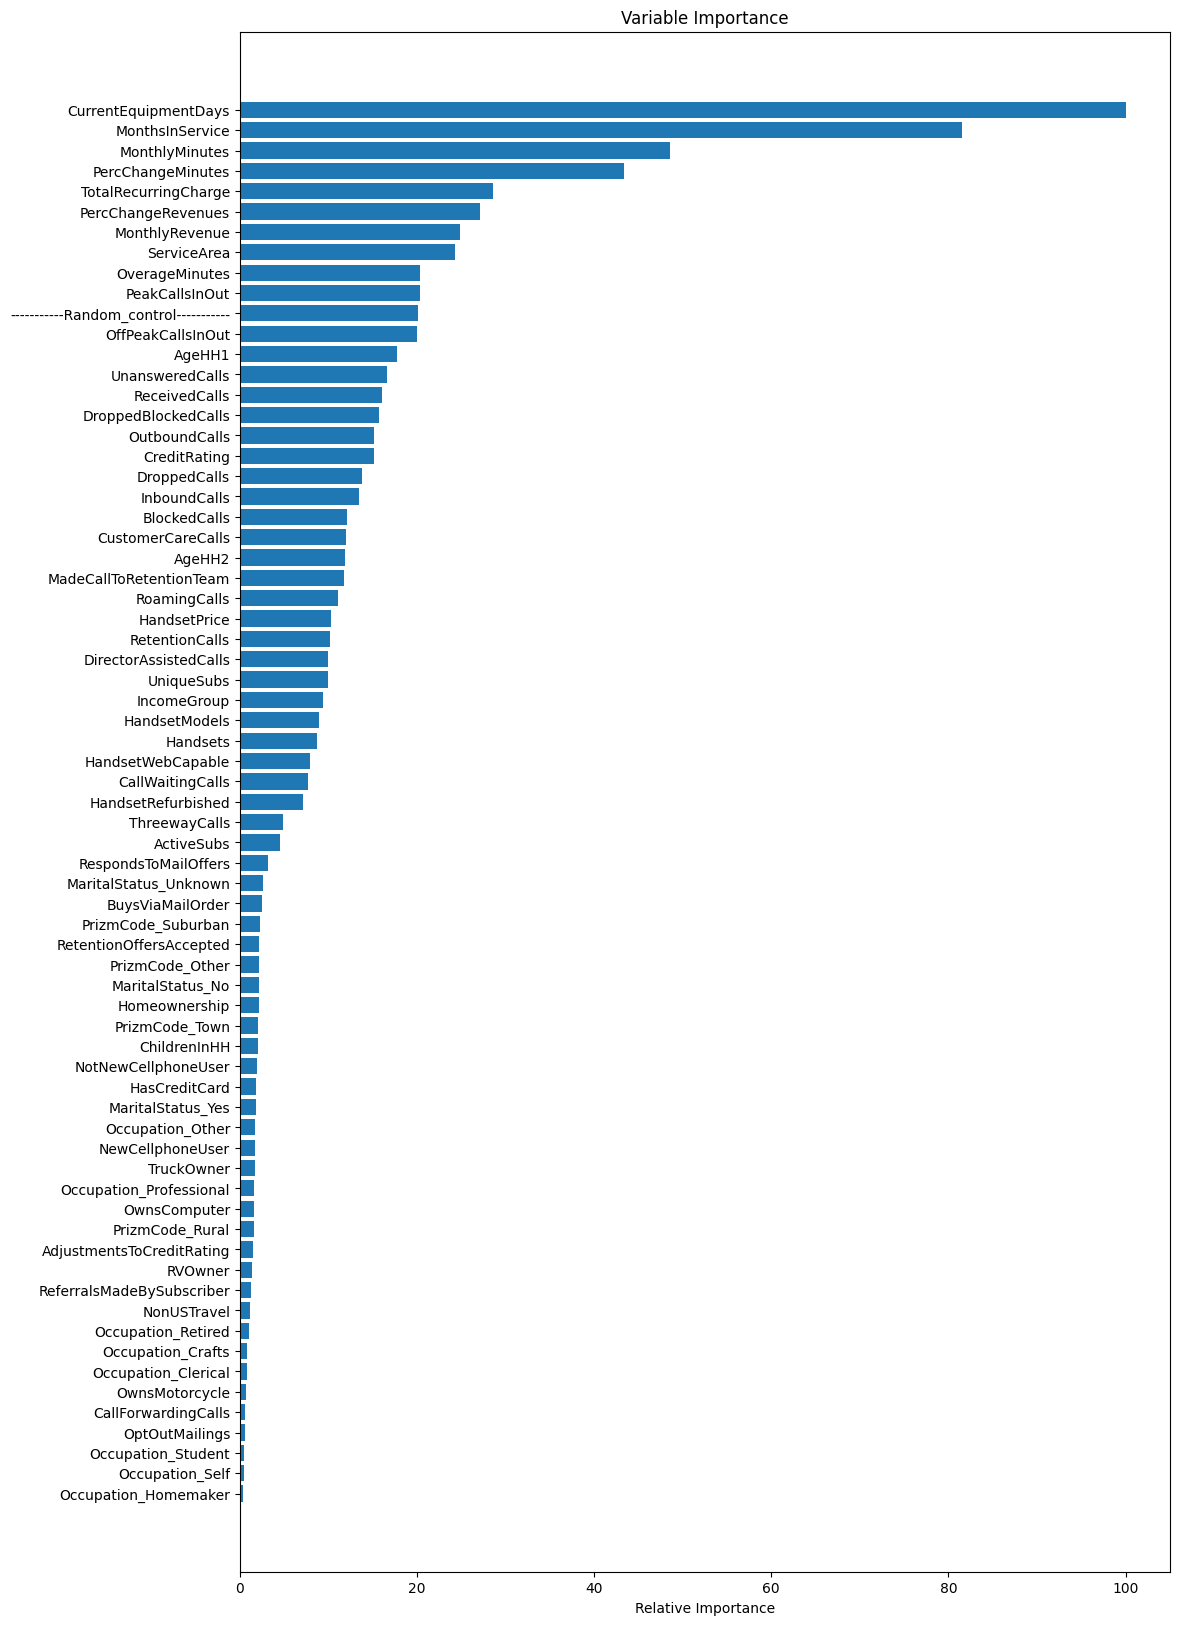

In [25]:
feature_importance = clf.feature_importances_ 
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_t.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [26]:
for id,fi in zip(X_t.keys()[sorted_idx], sorted(clf.feature_importances_)):
    print(f'{id}: {fi}')

Occupation_Homemaker: 0.00045920479694464374
Occupation_Self: 0.0006440430263531453
Occupation_Student: 0.0006447774713754467
OptOutMailings: 0.0007408504392260272
CallForwardingCalls: 0.0007434774975434252
OwnsMotorcycle: 0.0009226668331652274
Occupation_Clerical: 0.0009665970535237963
Occupation_Crafts: 0.00099437484092984
Occupation_Retired: 0.0013185448492867267
NonUSTravel: 0.0014848614468867063
ReferralsMadeBySubscriber: 0.0015346342702502091
RVOwner: 0.0016966881355650906
AdjustmentsToCreditRating: 0.0018973611653327427
PrizmCode_Rural: 0.0019720830667259827
OwnsComputer: 0.001987027217706376
Occupation_Professional: 0.0020074772003999416
TruckOwner: 0.002140835607136253
NewCellphoneUser: 0.0021773965744131046
Occupation_Other: 0.002178238487532993
MaritalStatus_Yes: 0.0022662811884267536
HasCreditCard: 0.0023594649001422783
NotNewCellphoneUser: 0.0024728448337802164
ChildrenInHH: 0.0025240824495684783
PrizmCode_Town: 0.002654147510235464
Homeownership: 0.002670435748907569
Mari

In [27]:
# to pandas df:
df_importance = pd.DataFrame({'feature':X_t.keys()[sorted_idx], 'importance':sorted(clf.feature_importances_)}).sort_values(by='importance', ascending=False)
df_importance.head(20)

,feature,importance
68,CurrentEquipmentDays,0.126423
67,MonthsInService,0.103083
66,MonthlyMinutes,0.061412
65,PercChangeMinutes,0.054781
64,TotalRecurringCharge,0.036112
63,PercChangeRevenues,0.034254
62,MonthlyRevenue,0.031354
61,ServiceArea,0.030734
60,OverageMinutes,0.025777
59,PeakCallsInOut,0.025762


In [28]:
threshold = 0.01
df_importance.style.background_gradient(cmap='YlOrRd', subset=['importance'])

,feature,importance
68,CurrentEquipmentDays,0.126423
67,MonthsInService,0.103083
66,MonthlyMinutes,0.061412
65,PercChangeMinutes,0.054781
64,TotalRecurringCharge,0.036112
63,PercChangeRevenues,0.034254
62,MonthlyRevenue,0.031354
61,ServiceArea,0.030734
60,OverageMinutes,0.025777
59,PeakCallsInOut,0.025762


In [30]:
threshold = 0.01
df_importance_filtered = df_importance[df_importance.importance>threshold]
df_importance_filtered.shape

(32, 2)

In [31]:
X_t_f = X_t[df_importance_filtered.feature].drop(columns='-----------Random_control-----------', axis=1)
display(X_t_f.head(), X_t_f.shape)

,CurrentEquipmentDays,MonthsInService,MonthlyMinutes,PercChangeMinutes,TotalRecurringCharge,PercChangeRevenues,MonthlyRevenue,ServiceArea,OverageMinutes,PeakCallsInOut,OffPeakCallsInOut,AgeHH1,UnansweredCalls,ReceivedCalls,DroppedBlockedCalls,OutboundCalls,CreditRating,DroppedCalls,InboundCalls,BlockedCalls,CustomerCareCalls,AgeHH2,MadeCallToRetentionTeam,RoamingCalls,HandsetPrice,RetentionCalls,DirectorAssistedCalls,UniqueSubs,IncomeGroup,HandsetModels,Handsets
0,-0.077010,4.310567,-0.578622,-0.567059,-1.042504,-0.451775,-0.783096,0.380114,-0.41379,-0.310154,-0.470619,1.395945,-0.565621,-0.105716,-0.569459,-0.720778,0.0,-0.587303,-0.490714,-0.309284,-0.366752,-0.869616,1.0,-0.125718,0.516028,1,-0.289052,0.382421,4.0,0.487086,0.146016
1,4.426588,4.004446,-0.973610,0.029233,-1.252478,0.030066,-0.940828,0.290525,-0.41379,-0.815173,-0.718593,0.391631,-0.658224,-0.689555,-0.633746,-0.720778,3.0,-0.631532,-0.490714,-0.373230,-0.366752,0.889077,0.0,-0.125718,0.516028,0,-0.401392,-0.434992,5.0,-0.616767,0.146016
2,5.640155,4.208527,-0.977390,0.037028,-0.370584,0.030066,-0.468083,0.204539,-0.41379,-0.850429,-0.689483,-0.247479,-0.727676,-0.687153,-0.653032,-0.712257,2.0,-0.664703,-0.490714,-0.373230,-0.366752,0.219099,0.0,-0.125718,-0.797977,0,-0.401392,-0.434992,6.0,-0.616767,-0.605213
3,0.305185,4.106486,1.487037,0.656704,1.183229,0.235483,0.528260,0.295254,-0.41379,4.432265,2.544956,-0.064876,1.227267,0.513561,3.184929,9.796479,3.0,5.085049,8.329790,0.330172,0.477033,-0.869616,0.0,-0.125718,0.312307,0,0.155811,0.382421,6.0,2.694792,5.404621
4,1.857607,3.494244,-0.992509,0.044823,-1.252478,0.024994,-0.937453,0.214164,-0.41379,-0.862816,-0.729374,0.665534,-0.727676,-0.689555,-0.653032,-0.720778,0.0,-0.664703,-0.490714,-0.373230,-0.366752,1.391560,0.0,-0.125718,0.312307,0,-0.401392,0.382421,9.0,1.590939,1.648475


(51047, 31)

In [32]:
deleted_features = X.columns.values[~np.isin(X.columns.values, df_importance_filtered.feature.values)]
deleted_features

array(['CustomerID', 'ThreewayCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'ActiveSubs', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'PrizmCode',
       'Occupation', 'MaritalStatus'], dtype=object)

In [34]:
corr = X_t_f.corr()

In [36]:
help(fr.plot_corr)

Help on function plot_corr in module functions_rfc:

plot_corr(corr, title='Matriz de correlaciones', figsize=(14, 8), target_text=False, annot_floor=0.4, annot_all=False, cmap='icefire', vmin=-1, vmax=1)
    ----------------------------------------------------------------------------------------------------------
    Función plot_corr:
    ----------------------------------------------------------------------------------------------------------
    - Funcionamiento:
        La función recibe una matriz de correlaciones y genera un gráfico tipo heatmap en base a ella.
        Se pueden determinar el título, tamaño del gráfico, y que cuadrantes tengan o no el valor de la
        correlación.
    - Inputs:
        - corr: Dataframe de la matriz de correlaciones
        - title: Título elegido. Por defecto será 'Matriz de correlaciones'
        - figsize: Tamaño del gráfico
        - target_text: Se debe activar si se desean mostrar todos los valores en los cuadrantes de la última
       

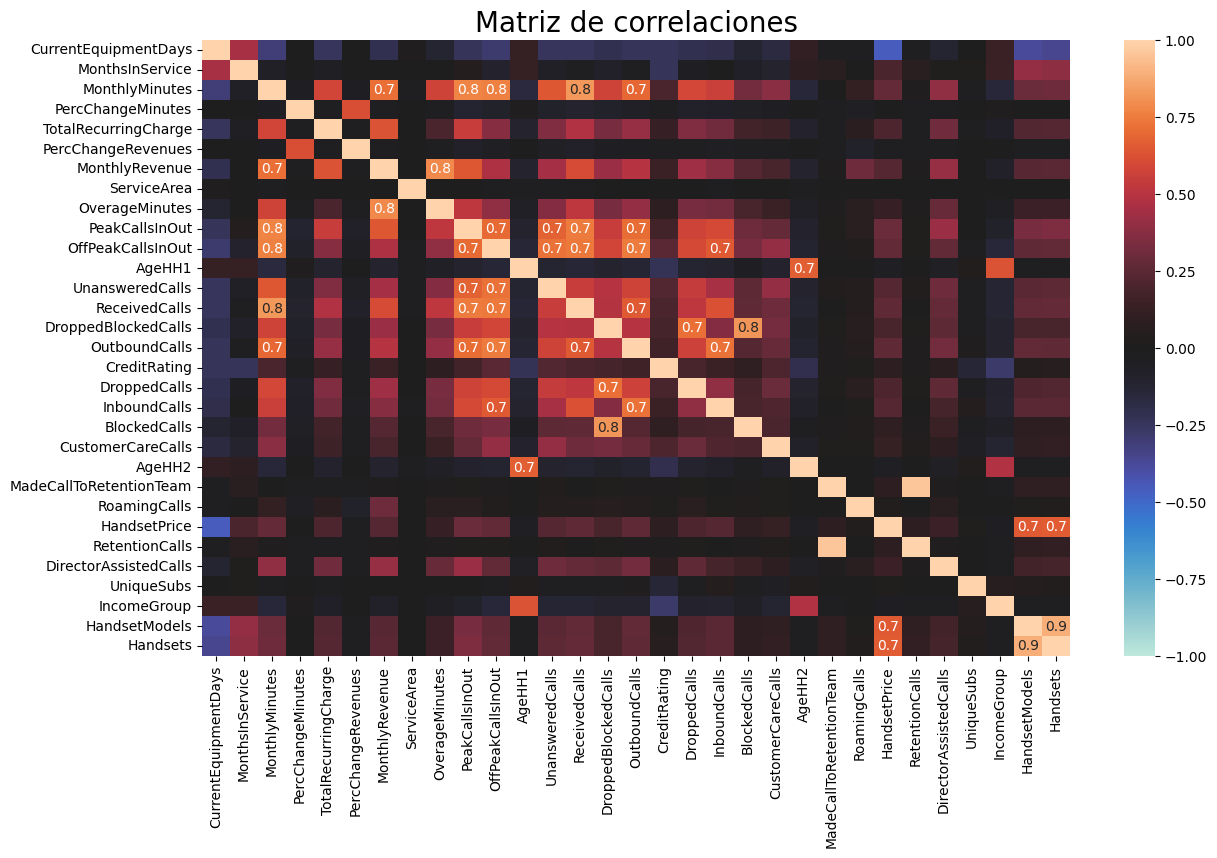

In [38]:
fr.plot_corr(corr, annot_floor=0.7)

In [18]:
from functools import partial

In [19]:
feat_sel = partial(feature_selection, add=deleted_features.tolist())

In [20]:
# importo train_test_split
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

In [21]:
# Separo en train y val
X_train, X_val, y_train, y_val = train_test_split(X_t, y, test_size=0.3, random_state=SEED, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((35732, 68), (15315, 68), (35732,), (15315,))

In [22]:
display(X_train.RetentionCalls.value_counts(normalize=True), X_val.RetentionCalls.value_counts(normalize=True))

RetentionCalls
0    0.966417
1    0.030841
2    0.002407
3    0.000280
4    0.000056
Name: proportion, dtype: float64

RetentionCalls
0    0.964414
1    0.033105
2    0.002220
3    0.000261
Name: proportion, dtype: float64

In [357]:
%%time

lgbm = LGBMClassifier(n_estimators=500
                    ,learning_rate=0.1
                    ,max_depth=10
                    ,random_state=SEED
                    ,n_jobs=-1
                    ,verbose=-1)

lgbm.fit(X_train, y_train)

CPU times: total: 9.17 s
Wall time: 1.86 s


LGBMClassifier(max_depth=10, n_estimators=500, n_jobs=-1, random_state=10,
               verbose=-1)

In [358]:
y_pred_lgbm = lgbm.predict(X_val)

In [359]:
fr.metrics_summ(y_val, y_pred_lgbm)


Accuracy: 0.72086
Balanced Accuracy: 0.56152
F2 score: 0.21354
F1 score: 0.27677
Precision: 0.54643
Recall: 0.18532

Confusion Matrix:
[[10222   679]
 [ 3596   818]]


In [360]:
y_pred_proba_lgbm = lgbm.predict_proba(X_val)[:,1]

In [361]:
df_aux = pd.concat([pd.Series(y_pred_proba_lgbm), pd.Series(y_val.reset_index(drop=True))], axis=1).rename(columns={0:'y_pred_proba', 'Churn':'y_true'})

In [362]:
df_aux.describe()

,y_pred_proba,y_true
count,15315.000000,15315.000000
mean,0.277478,0.288214
std,0.159912,0.452946
min,0.006816,0.000000
25%,0.153679,0.000000
50%,0.254101,0.000000
75%,0.371804,1.000000
max,0.963753,1.000000


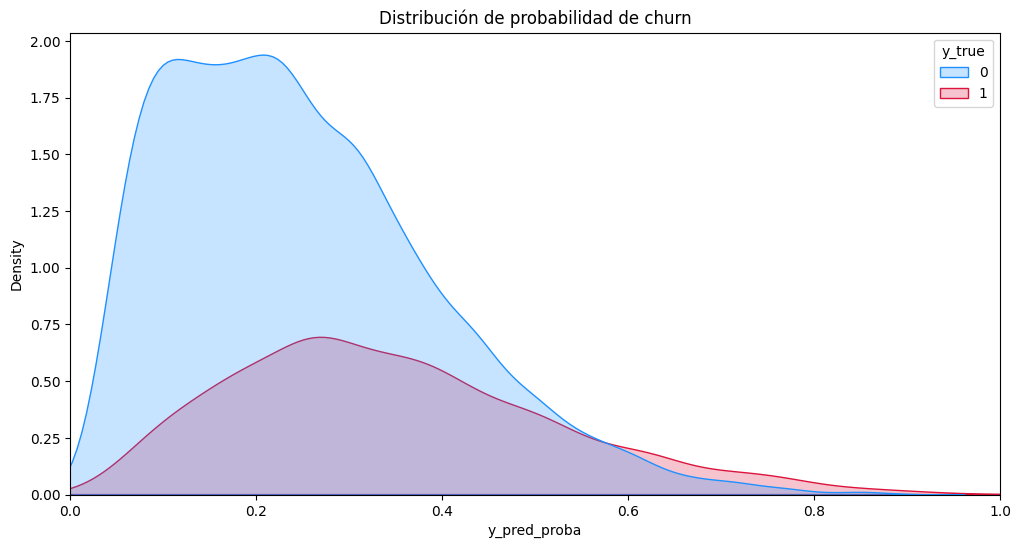

In [363]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df_aux, x='y_pred_proba', hue='y_true', ax=ax, fill=True, palette=['dodgerblue','crimson'])
ax.set_title('Distribución de probabilidad de churn')
ax.set_xlim(0,1)
plt.show()